In [1]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from src.config import PROCESSED_DATA_DIR

input_test_path: Path = PROCESSED_DATA_DIR / "testset.csv"

df = pd.read_csv(str(input_test_path), index_col='id')
df.head()

2024-10-19 11:52:56.505 | INFO     | src.config:<module>:14 - PROJ_ROOT path is: G:\Work\DS\dont-bet-on-sports


,tm_spread,opp_spread,total,temperature,humidity_pct,wind_speed,week,tm_first_downs,tm_fourth_down_att,tm_fourth_down_conv,...,opp_location_N,tm_location_H,tm_location_N,week_day_Fri,week_day_Mon,week_day_Sat,week_day_Sun,week_day_Thu,week_day_Tue,week_day_Wed
id,,,,,,,,,,,,,,,,,,,,,
201910200nyg,-0.111111,0.111111,0.750000,-0.35,0.965517,0.068182,7,-9.172793,-2.186667,-2.280677,...,0,1,0,0,0,0,1,0,0,0
201910200gnb,-0.333333,0.333333,0.500000,-0.40,0.827586,0.136364,7,-9.172793,-2.186667,-2.280677,...,0,1,0,0,0,0,1,0,0,0
201910200oti,-0.055556,0.055556,-0.416667,0.70,-0.344828,0.045455,7,-9.172793,-2.186667,-2.280677,...,0,1,0,0,0,0,1,0,0,0
201910200chi,-0.166667,0.166667,-1.333333,-0.45,1.172414,0.136364,7,-9.172793,-2.186667,-2.280677,...,0,1,0,0,0,0,1,0,0,0
201910200sea,-0.055556,0.055556,0.666667,-0.65,1.000000,0.181818,7,-9.172793,-2.186667,-2.280677,...,0,1,0,0,0,0,1,0,0,0


### Random Forest Regression

In [2]:
from src.modeling.predict import predict_random_forests

rfr_results = predict_random_forests(df.drop(columns=['r_spread']))

In [3]:
from sklearn.metrics import mean_absolute_error as mae 

rfr_mae = mae(df['r_spread'], rfr_results)
print(rfr_mae)

10.168929402637703


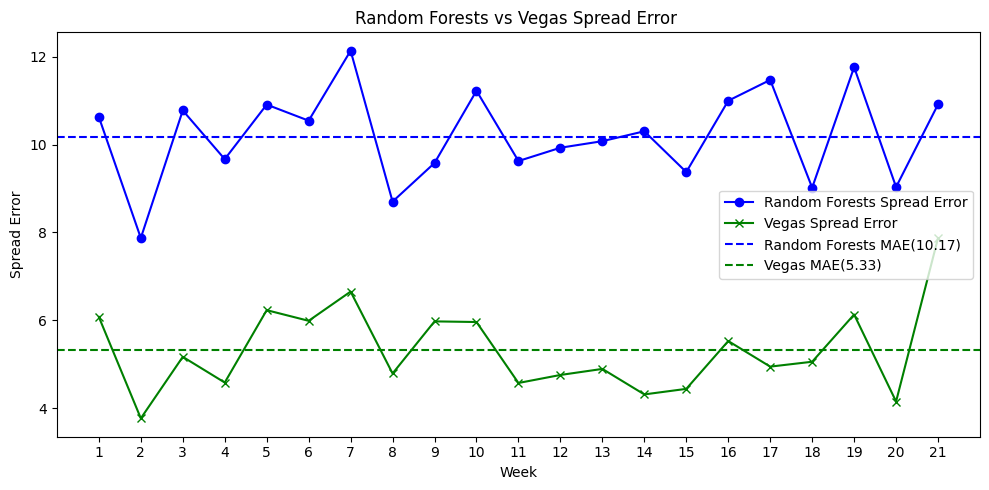

In [4]:
from src.plots import plot_error
df_model = df.assign(pred = rfr_results)
plot_error(df_model, 'Random Forests')

### Support Vector Regression

In [5]:
from src.modeling.predict import predict_support_vectors

svr_results = predict_support_vectors(df.drop(columns=['r_spread']))

In [6]:
svr_mae = mae(df['r_spread'], svr_results)
print(svr_mae)

10.182627578210042


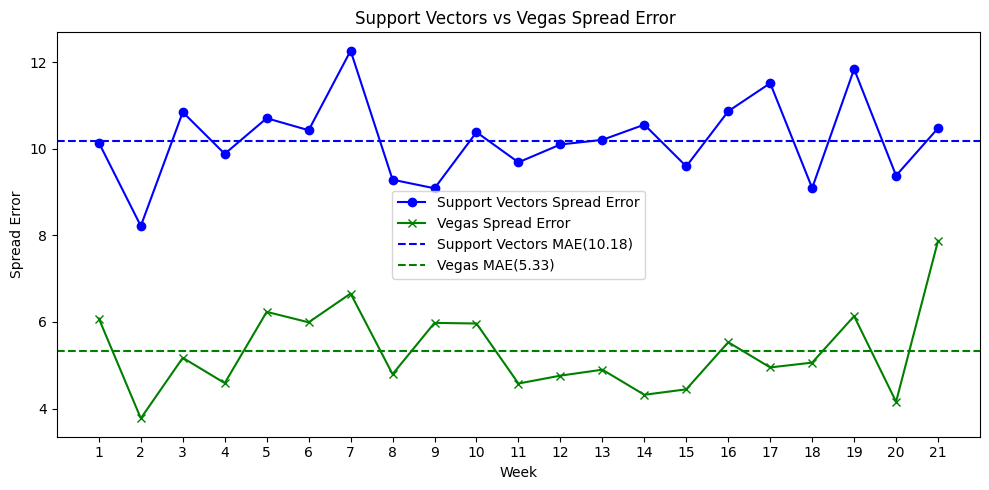

In [7]:
df_model = df.assign(pred = svr_results)
plot_error(df_model, 'Support Vectors')

### Gradient Boosted Trees

In [8]:
from src.modeling.predict import predict_gbt

gbt_results = predict_gbt(df.drop(columns=['r_spread']))
gbt_mae = mae(df['r_spread'], gbt_results)
print(gbt_mae)

11.360737704552704


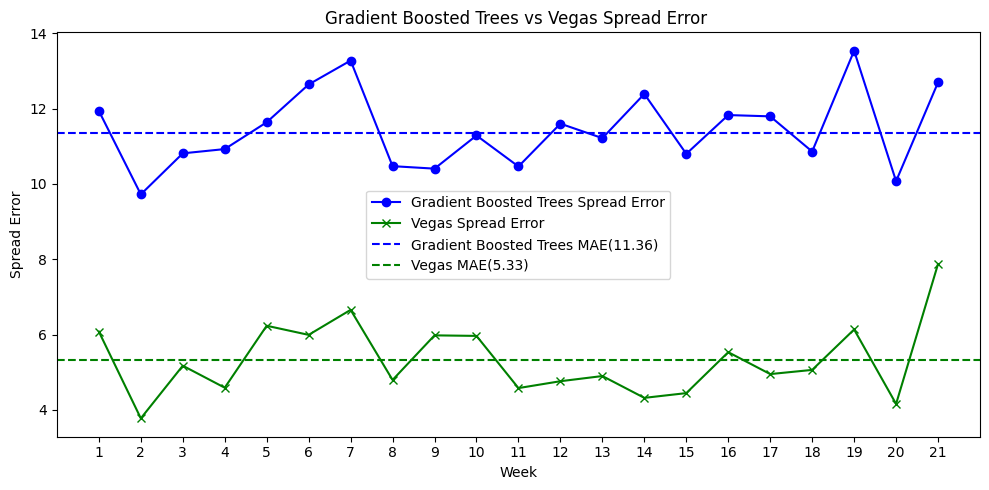

In [9]:
df_model = df.assign(pred = gbt_results)
plot_error(df_model, 'Gradient Boosted Trees')